In [227]:
import csv
import requests
import numpy as np
import pandas as pd
from io import StringIO
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import datetime

plt.close('all')

In [345]:
CSV_URL = 'https://covidtracking.com/api/v1/states/daily.csv'

with requests.Session() as s:
    download = s.get(CSV_URL)
    
    download

In [638]:
    decoded_content = download.content.decode('utf-8')

In [760]:
    #cr = csv.reader(decoded_content.splitlines(), delimiter=',')
    cr = pd.read_csv(StringIO(decoded_content))
    df = pd.DataFrame(cr)   

In [761]:
df.head()

,date,state,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,...,posNeg,deathIncrease,hospitalizedIncrease,hash,commercialScore,negativeRegularScore,negativeScore,positiveScore,score,grade
0,20200703,AK,1063.0,119145.0,NaN,25.0,NaN,NaN,NaN,3.0,...,120208,1,0,fab1145c346d70ae703d92bac3676bff80ea5b24,0,0,0,0,0,NaN
1,20200703,AL,41865.0,388766.0,NaN,812.0,2883.0,NaN,838.0,NaN,...,430631,21,48,006e67beae01e0951e200fa82656c58a1c14cd70,0,0,0,0,0,NaN
2,20200703,AR,22622.0,308615.0,NaN,285.0,1517.0,NaN,NaN,70.0,...,331237,2,40,763acfae6de0f8e0286ba20d9bc32cb65140d0d0,0,0,0,0,0,NaN
3,20200703,AS,0.0,696.0,NaN,NaN,NaN,NaN,NaN,NaN,...,696,0,0,58e291468f971e8a0ec0c5bfa8d56fc8e202a69e,0,0,0,0,0,NaN
4,20200703,AZ,91858.0,486523.0,NaN,3013.0,5018.0,741.0,NaN,489.0,...,578381,31,102,6f8c2473baf5cfc6b187c3a5425c301a4d645524,0,0,0,0,0,NaN


In [762]:
date = pd.to_datetime(df['date'].astype(str), format='%Y%m%d')

In [763]:
df3 = pd.DataFrame({'date':date, 'state':df['state'], 'positiveIncrease':df['positiveIncrease']})

In [764]:
stateNames = ['WA', 'ID', 'MT', 'ND', 'MN','WI','MI','NY','VT', 'NH','ME',
             'OR','WY', 'SD', 'IA', 'IL', 'IN', 'OH', 'PA', 'MA', 'RI', 'CT', 'NJ',
             'DE', 'MD', 'DC', 'CA', 'NV', 'UT', 'CO', 'NE', 'MO', 'KS', 'OK', 'NM', 
              'AZ', 'TX', 'LA', 'AR', 'TN', 'MS', 'AL', 'KY', 'WV', 'VA', 'NC',
             'SC', 'GA', 'FL', 'AK', 'HI']
dfstates = []
len(stateNames)

51

In [765]:
for name in stateNames:
    sel = df3[(df3['state']==name)]
    sel.index=sel['date']
    dfstates.insert(len(dfstates), sel)
s = 'positiveIncrease'
dfgroup = pd.DataFrame()
#dfgroup['date'] = dfstates[0]['date']

for d in dfstates:
    dfgroup[d['state'][0]] = d[s]

dfgroup.head()

,WA,ID,MT,ND,MN,WI,MI,NY,VT,NH,...,AL,KY,WV,VA,NC,SC,GA,FL,AK,HI
date,,,,,,,,,,,,,,,,,,,,,
2020-07-03,716,223.0,45.0,65.0,414.0,622.0,497.0,918.0,9.0,20.0,...,1754.0,297.0,73.0,658.0,2099.0,1831.0,2784.0,9488.0,46.0,20.0
2020-07-02,611,253.0,67.0,42.0,494.0,584.0,589.0,875.0,17.0,20.0,...,1149.0,237.0,121.0,532.0,1629.0,1782.0,3472.0,10109.0,39.0,9.0
2020-07-01,571,365.0,49.0,39.0,413.0,563.0,361.0,625.0,2.0,22.0,...,917.0,218.0,27.0,416.0,1843.0,1520.0,2946.0,6563.0,38.0,17.0
2020-06-30,501,433.0,48.0,37.0,442.0,629.0,505.0,524.0,0.0,0.0,...,870.0,277.0,35.0,598.0,1186.0,1755.0,1874.0,6093.0,36.0,1.0
2020-06-29,348,0.0,56.0,44.0,312.0,326.0,277.0,391.0,6.0,43.0,...,1734.0,115.0,53.0,453.0,1342.0,1324.0,2207.0,5266.0,21.0,27.0


In [766]:
nrows = dfgroup.shape[0]
nrows

164

In [767]:
ncols = dfgroup.shape[1]
ncols

51

In [768]:
#fig = plt.figure();
plt.style.use('fivethirtyeight')
#plot = dfgroup.plot(subplots=True, layout=(6,6), figsize=(30,20), sharex=True, sharey=False)

In [769]:
gs = gridspec.GridSpec(4, 4)

In [770]:
def do_plot(ax, name):
    color = 'C'+str(dfgroup.columns.get_loc(name))
    ax.plot(dfgroup[name], color=(color))
    ax.set_xlabel('')
    ax.grid(True)
    ax.set_xticklabels('')
    ax.set_yticklabels('')
    ax.set_title('')
    plt.text(0, 1, name,
         horizontalalignment='left',
         fontsize=10,
         transform = ax.transAxes,
             color=(color))

In [771]:
#fig = plt.figure(figsize=(13,10))
#for n in range(ncols):
#    ax = fig.add_subplot(gs[n])
#    do_plot(ax, n)

In [772]:
def add_state(figure, stateName, grid):
    state = figure.add_subplot(grid)
    do_plot(state, stateName)

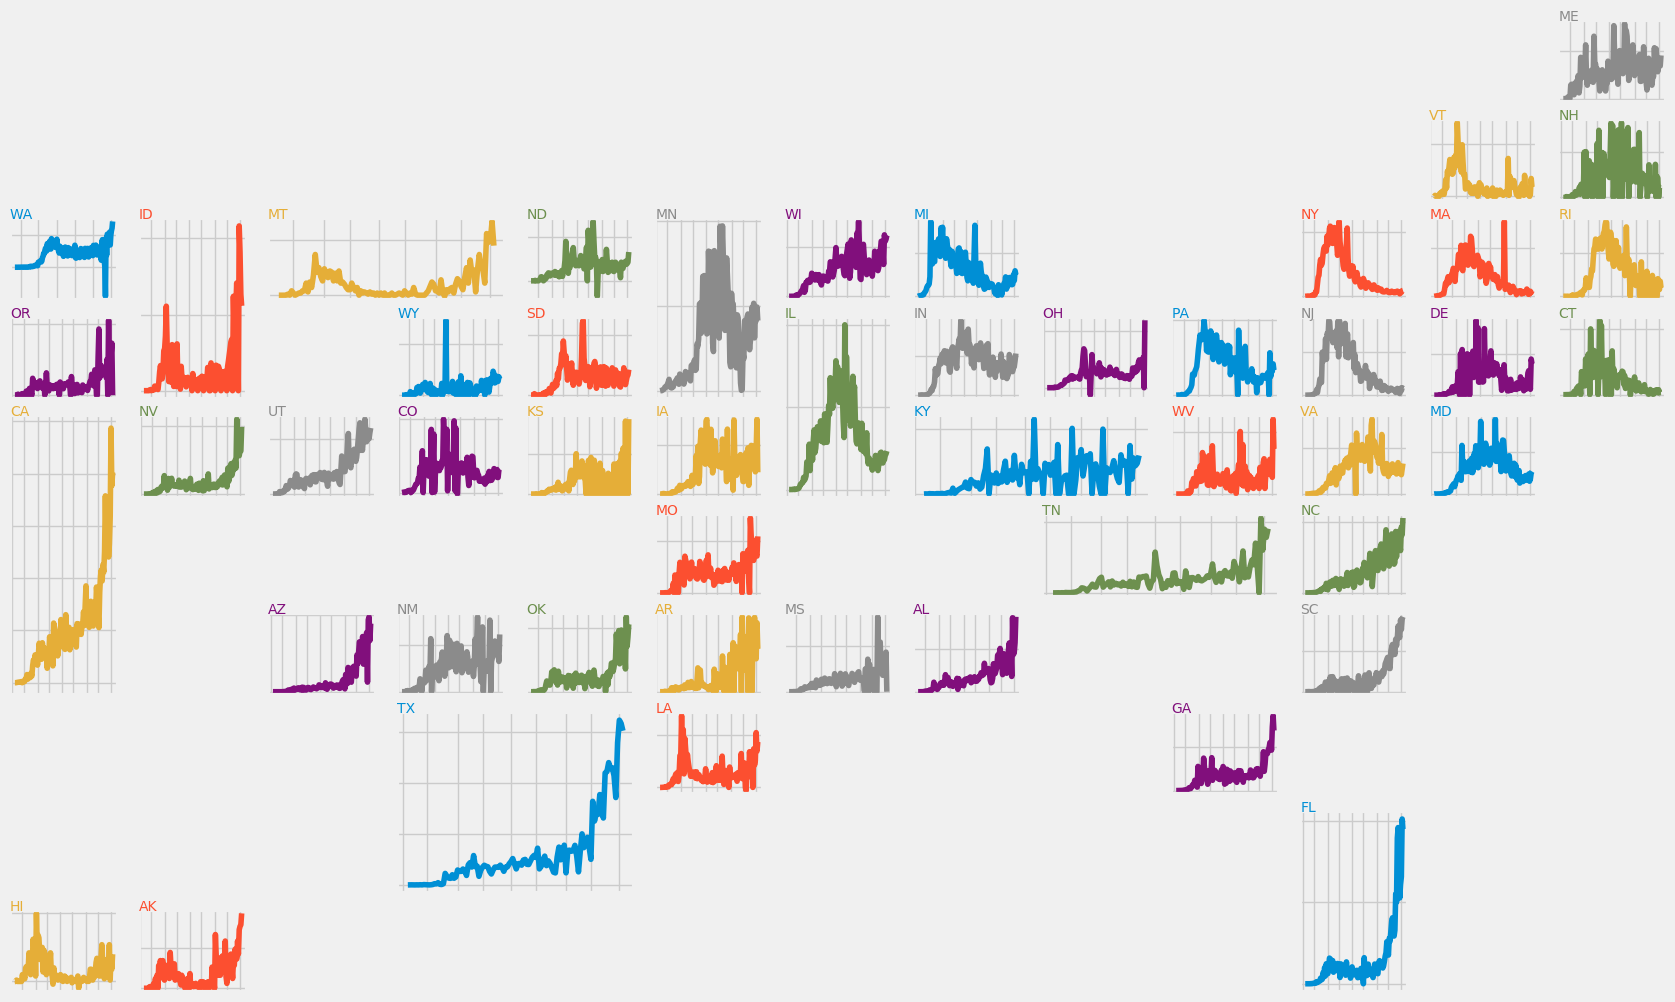

In [773]:
#plt.style.use('default')

g = gridspec.GridSpec(10, 15)
fig = plt.figure(figsize=(22,12))

add_state(fig, 'WA', g[2,0])
add_state(fig, 'ID', g[2:4,1]) 
add_state(fig, 'MT', g[2,2:4]) 
add_state(fig, 'ND', g[2,4]) 
add_state(fig, 'MN', g[2:4,5]) 
add_state(fig, 'WI', g[2,6]) 
add_state(fig, 'MI', g[2,7]) 
add_state(fig, 'NY', g[2,10]) 
add_state(fig, 'VT', g[1,11]) 
add_state(fig, 'NH', g[1,12])
add_state(fig, 'ME', g[0,12])
add_state(fig, 'OR', g[3, 0])
add_state(fig, 'WY', g[3, 3])
add_state(fig, 'SD', g[3, 4])
add_state(fig, 'IA', g[4, 5])
add_state(fig, 'IL', g[3:5,6])
add_state(fig, 'IN', g[3, 7])
add_state(fig, 'OH', g[3, 8])
add_state(fig, 'PA', g[3, 9])
add_state(fig, 'NJ', g[3, 10])
add_state(fig, 'MA', g[2, 11])
add_state(fig, 'DE', g[3, 11])
add_state(fig, 'RI', g[2,12])
add_state(fig, 'CT', g[3,12])
add_state(fig, 'CA', g[4:7, 0])
add_state(fig, 'AZ', g[6, 2])
add_state(fig, 'NV', g[4, 1])
add_state(fig, 'UT', g[4,2])
add_state(fig, 'CO', g[4, 3])
add_state(fig, 'KS', g[4, 4])
add_state(fig, 'OK', g[6, 4])
add_state(fig, 'MO', g[5, 5])
add_state(fig, 'KY', g[4, 7:9])
add_state(fig, 'TN', g[5, 8:10])
add_state(fig, 'WV', g[4, 9])
add_state(fig, 'AR', g[6, 5])
add_state(fig, 'NM', g[6, 3])
add_state(fig, 'TX', g[7:9, 3:5])
add_state(fig, 'LA', g[7, 5])
add_state(fig, 'MS', g[6, 6])
add_state(fig, 'AL', g[6, 7])
add_state(fig, 'GA', g[7, 9])
add_state(fig, 'SC', g[6, 10])
add_state(fig, 'NC', g[5, 10])
add_state(fig, 'VA', g[4, 10])
add_state(fig, 'MD', g[4,11])
add_state(fig, 'FL', g[8:10, 10])
add_state(fig, 'HI', g[9, 0])
add_state(fig, 'AK', g[9, 1])